## Imports

In [35]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Use the data from the file, read it to a dataframe and make any modification that you may find useful to solve the task

In [36]:
ab_df = pd.read_csv('../data/ab-test.csv')
ab_df.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


In [37]:
before_first = ab_df.loc[ab_df.time == 'before'][['group', 'diff']]
before_first

,group,diff
1,test,-6.000000
3,test,-3.500000
5,test,-148.000000
7,test,-112.500000
9,test,-69.333333
11,test,-53.000000
13,test,-70.000000
15,control,-103.000000
17,control,-15.500000
19,control,-3.000000


In [38]:
before = []
before.append(before_first.loc[before_first.group == 'control']['diff'].tolist())
before.append(before_first.loc[before_first.group == 'test']['diff'].tolist())

In [39]:
after_first = ab_df.loc[ab_df.time == 'after'][['group', 'diff']]
after_first

,group,diff
0,test,-103.333333
2,test,-10.000000
4,test,-82.333333
6,test,-78.500000
8,test,-127.500000
10,test,-136.500000
12,test,-158.500000
14,control,-75.000000
16,control,-81.500000
18,control,-32.000000


In [40]:
after = []
after.append(after_first.loc[after_first.group == 'control']['diff'].tolist())
after.append(after_first.loc[after_first.group == 'test']['diff'].tolist())

## For graph:
• the figsize is still the same, you can choose whatever fontsize you like
• the color palette should be the same as in the example
• the fontsize of the title is 15
• the width of the box lines is 3, the width of the median lines is 2

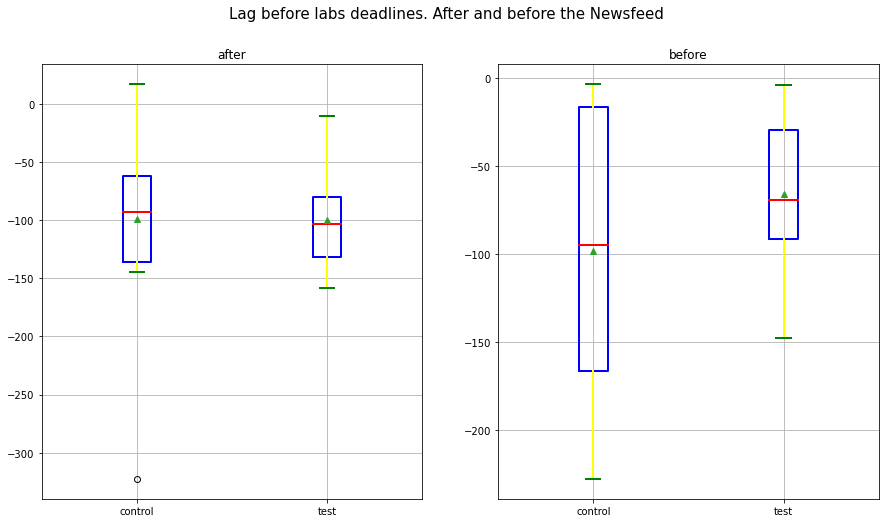

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].boxplot(after,
               labels=['control', 'test'],
               showmeans=True,
               boxprops={ 'color': 'blue', 'linewidth': 2 },
               whiskerprops={ 'color': 'yellow', 'linewidth': 2},
               capprops={ 'color': 'green', 'linewidth': 2 },
               medianprops={ 'color': 'red', 'linewidth': 2 }
              )
axs[0].set_title('after')
axs[0].grid('xy')

axs[1].boxplot(before, 
               labels=['control', 'test'],
               showmeans=True,
               boxprops={ 'color': 'blue', 'linewidth': 2 },
               whiskerprops={ 'color': 'yellow', 'linewidth': 2 },
               capprops={ 'color': 'green', 'linewidth': 2 },
               medianprops={ 'color': 'red', 'linewidth': 2 }
              )
axs[1].set_title('before')
axs[1].grid('xy')

plt.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.show()

## What was the IQR of the control group before the newsfeed?

150